In [1]:
!pip install -r requirements.txt


  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-xogxoprq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-xogxoprq
  Resolved https://github.com/huggingface/diffusers to commit 2bfa55f4ed39f9dd6fed82720d87f6d4e60f21e3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import os
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


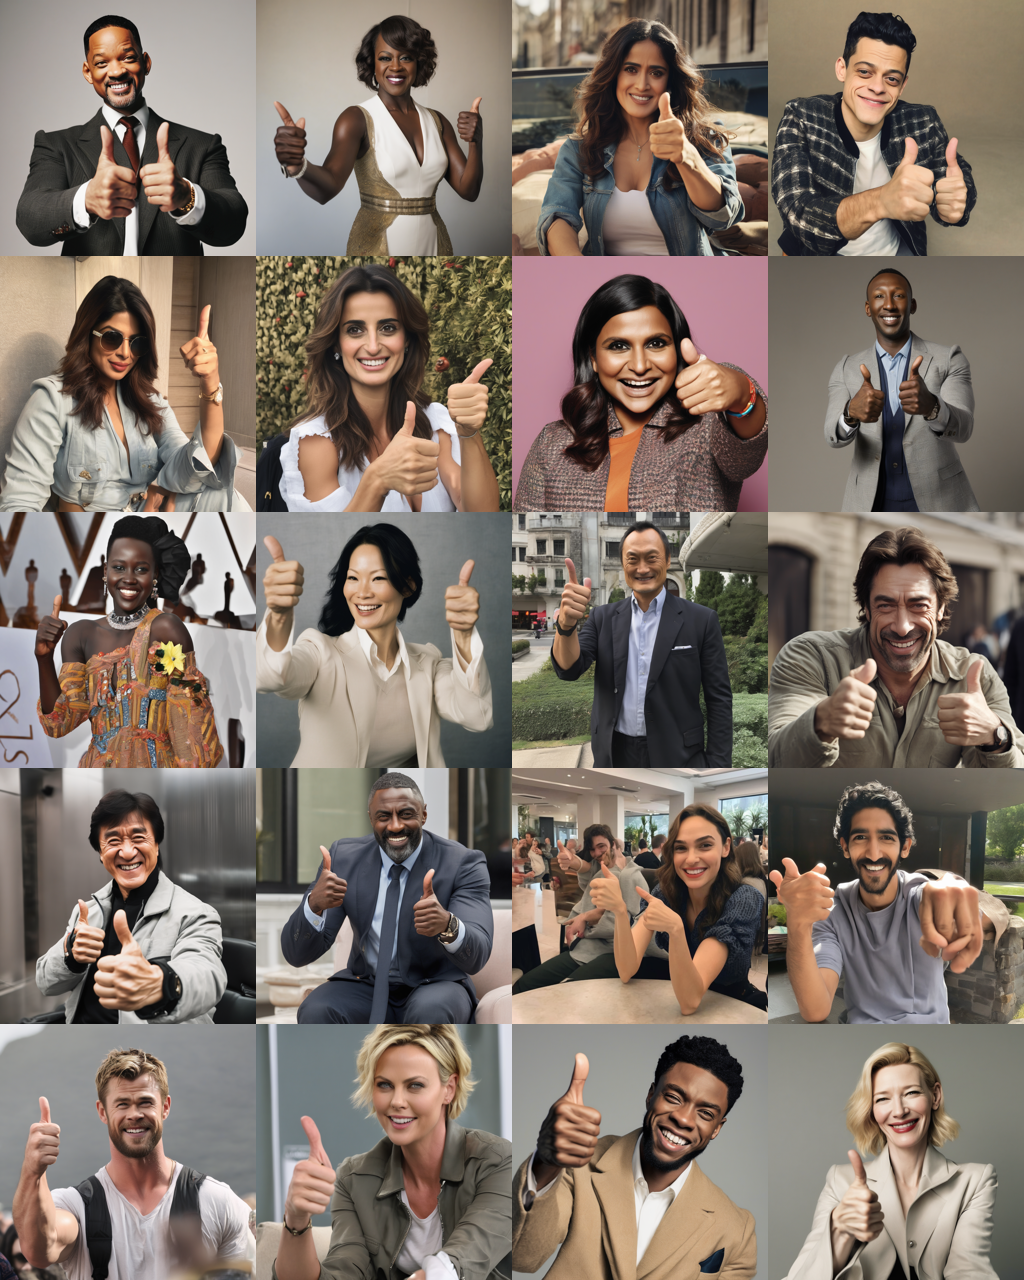

In [4]:
# show baseline
refined = False
path = os.path.join("logs/baseline", "refined" if refined else "unrefined")

# load all images in directory 
images = [Image.open(os.path.join(path, filename)) for filename in os.listdir(path)]

# scale images to 1/16 size
images = [image.resize((image.width // 4, image.height // 4)) for image in images]

image_grid(images, 5, 4)




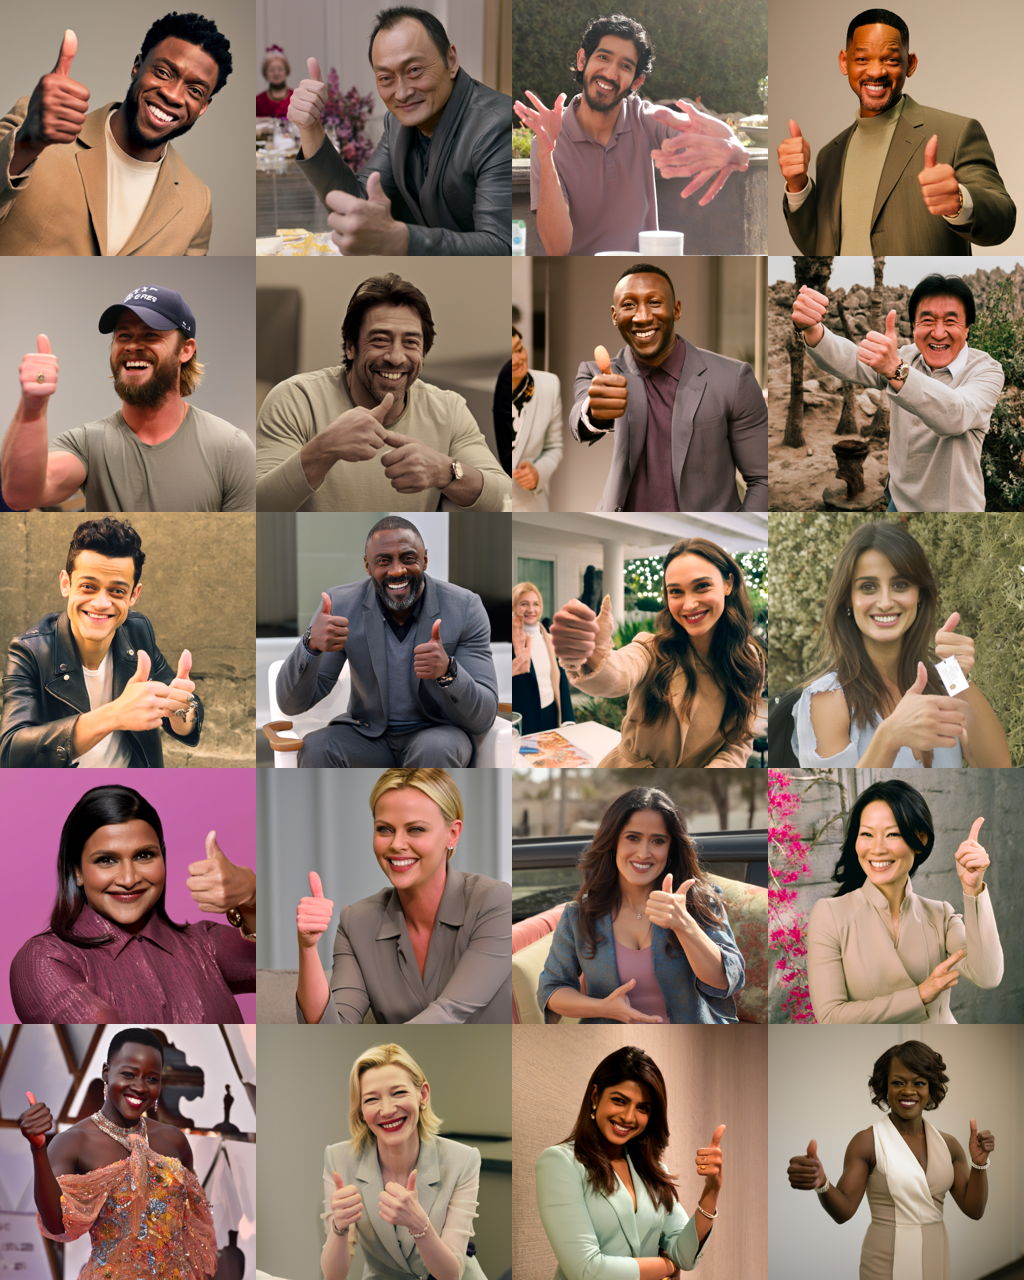

In [13]:
# select run

learning_rate_to_run = {
    1e-4: "logs/sweep_final_0_20231013091146",
    1e-5: "logs/sweep_final_1_20231013093620",
    1e-6: "logs/sweep_final_2_20231013102808",
    1e-7: "logs/sweep_final_3_20231013105322",
}

refined = False
learning_rate = 1e-4 
path = os.path.join(learning_rate_to_run[learning_rate], "images", "refined" if refined else "unrefined")

# load all images in directory 
images = [Image.open(os.path.join(path, filename)) for filename in os.listdir(path)]

# scale images to 1/16 size
images = [image.resize((image.width // 4, image.height // 4)) for image in images]

image_grid(images, 5, 4)


In [2]:
import os
from typing import List
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe=pipe.to(device)
celebrity = "Idris Elba"
prompt = f"a photo of {celebrity} showing <thumbs_up> thumbs up"
img = pipe(prompt).images[0]

img


In [ ]:
pipe.load_lora_weights("logs/sweep_final_2_20231013102808/pytorch_lora_weights.safetensors")
